In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('클래스 레이블: ', np.unique(y))

클래스 레이블:  [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
"""test : train = 7 : 3"""

'test : train = 7 : 3'

In [3]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))
"""골고루 들어갈 수 있음"""

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


'골고루 들어갈 수 있음'

In [4]:
from sklearn.preprocessing import StandardScaler

"""Preprocessing : 변환기, StandardScaler : 표준화"""
"""모델의 fit 메소드는 훈련, predict 메소드에서 예측"""
"""변환기의 경우 fit 데이터 훈련, Transofrm 메소드에서 변환"""

sc = StandardScaler()
sc.fit(X_train) # X_train에 있는 각 특성별로 평균과 표준편차를 구함
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron

"""
해당 클래스는 SGdClassifer와 상당히 유사한데, SGDClassifier(loss='perceptron')과 거의 같다.
여기서 loss는 손실함수를 의미하며, loss에 다른 것들을 지정하면 다양한 분류 알고리즘을 경사하강법 방법으로 해를 구할 수 있다.

Perceptron과 SGDClassifier는 BaseSGDClassifier라는 부모 클래스를 공유한다.
"""


ppn = Perceptron(eta0=0.1, random_state=1) #eta0은 학습률
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [7]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

"""실제 Target 값vs예측한 값"""

정확도: 0.978


'실제 Target 값vs예측한 값'

In [8]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

#이런 식으로 모델 클래스에도 있다.

정확도: 0.978


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

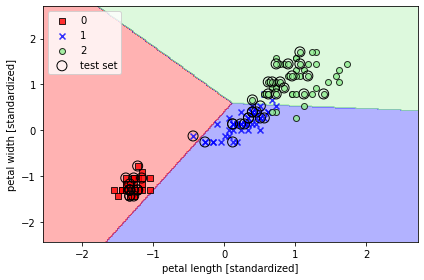

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

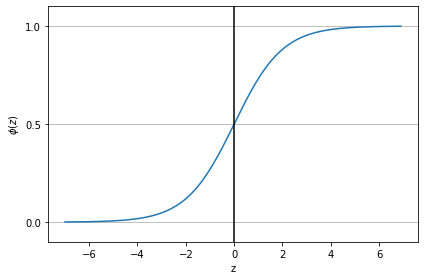

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
"""1/(1+e^(-z))"""

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() #축 그대로 사용
ax.yaxis.grid(True) #격자 무늬 True

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

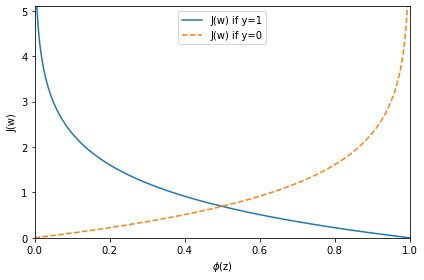

In [12]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

#양 끝이 최소 비용인 것을 의미

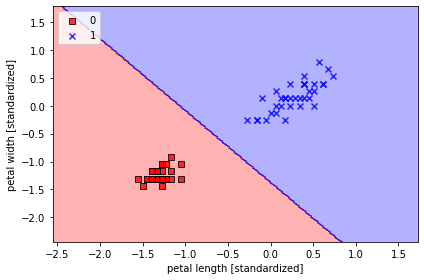

In [13]:
from LogisticRegressionGD import LogisticRegressionGD

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)] #간단하게 이진 분류만..
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

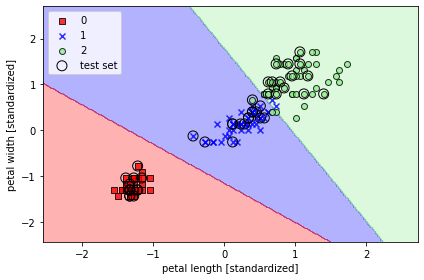

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1) #모델 가져오기
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [15]:
lr.predict_proba(X_test_std[:3, :])
#"""예측확률 구하기, 1~3번 행만 가져와서 비교"""

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [17]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)
#"""각 행을 모두 더해서 값 확인, 당연히 1이 나와야겠지요...?"""

'각 행을 모두 더해서 값 확인, 당연히 1이 나와야겠지요...?'

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
#각 꽃의 분류 결과를 확인하는 것.

In [ ]:
lr.predict(X_test_std[:3, :])
#결국 위와 결과가 같다.

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))
#차원의 배열 변경
#사이킷런은 2차원 입력데이터를 받는다.
#reshape(1,-1) 은 행은 1이고, -1은 그 데이터에 맞춰서 알아서 reshape

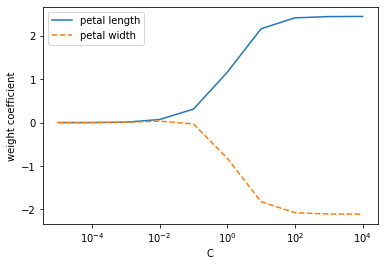

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('images/03_08.png', dpi=300)
plt.show()

#규제 = Regularization
#c가 클수록 규제가 풀어지면서 가중치 업데이트가 유연해지기에, 아래와 같이 length, width가 삭삭 변함
#c가 작아질수록 규제가 엄격해지면서 가중치업데이트 x 